<a href="https://colab.research.google.com/github/mrgodata/SAheart/blob/main/231122SAheart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#sns.set(style='whitegrid')
#sns.set(font='Malgun Gothic')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/개인프로젝트/0data/0home_desktop/data/SAheart.csv')

In [ ]:
df.head()#양성Si음성No

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si


In [ ]:
df.shape

(462, 10)

In [ ]:
df.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [ ]:
df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000


- sbp		systolic blood pressure 수축기 혈압
- Tobacco	cumulative tobacco (kg) 누적 담배사용량
- ldl		low density lipoprotein cholesterol 저밀도 지단백질 콜레스테롤
- adiposity	아량
- Famhist	family history of heart disease (Present, Absent) 심장질환 가족력
- typea		type-A behavior A형 행동
- obesity 	비만
- alcohol	current alcohol consumption 알코올 소비량
- age		age at onset 시작 나이
- chd		response, coronary heart disease 관상동맥 심장병


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 36.2+ KB


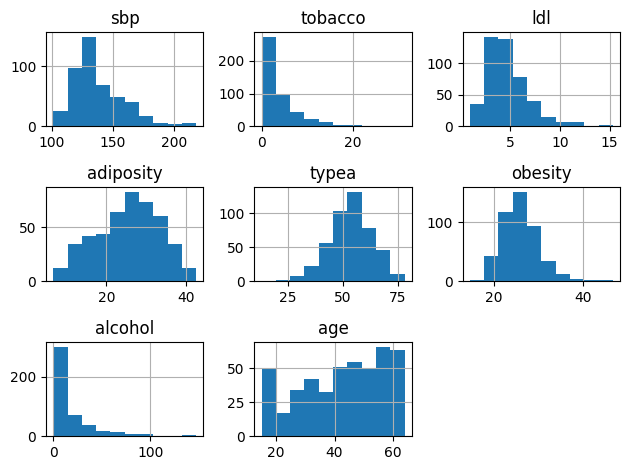

In [ ]:
#히스토그램으로 분포 확인
df.hist()
plt.tight_layout()
plt.show()

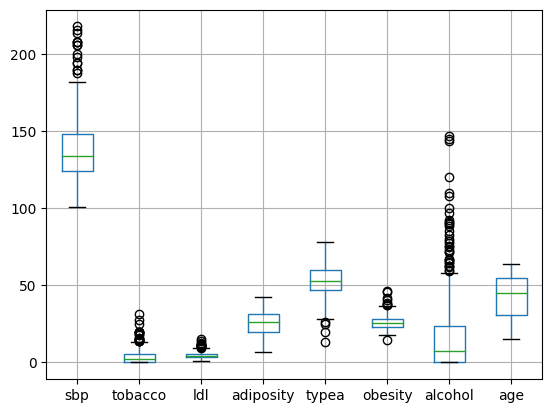

In [ ]:
# scaling확인
df.boxplot()

plt.show()


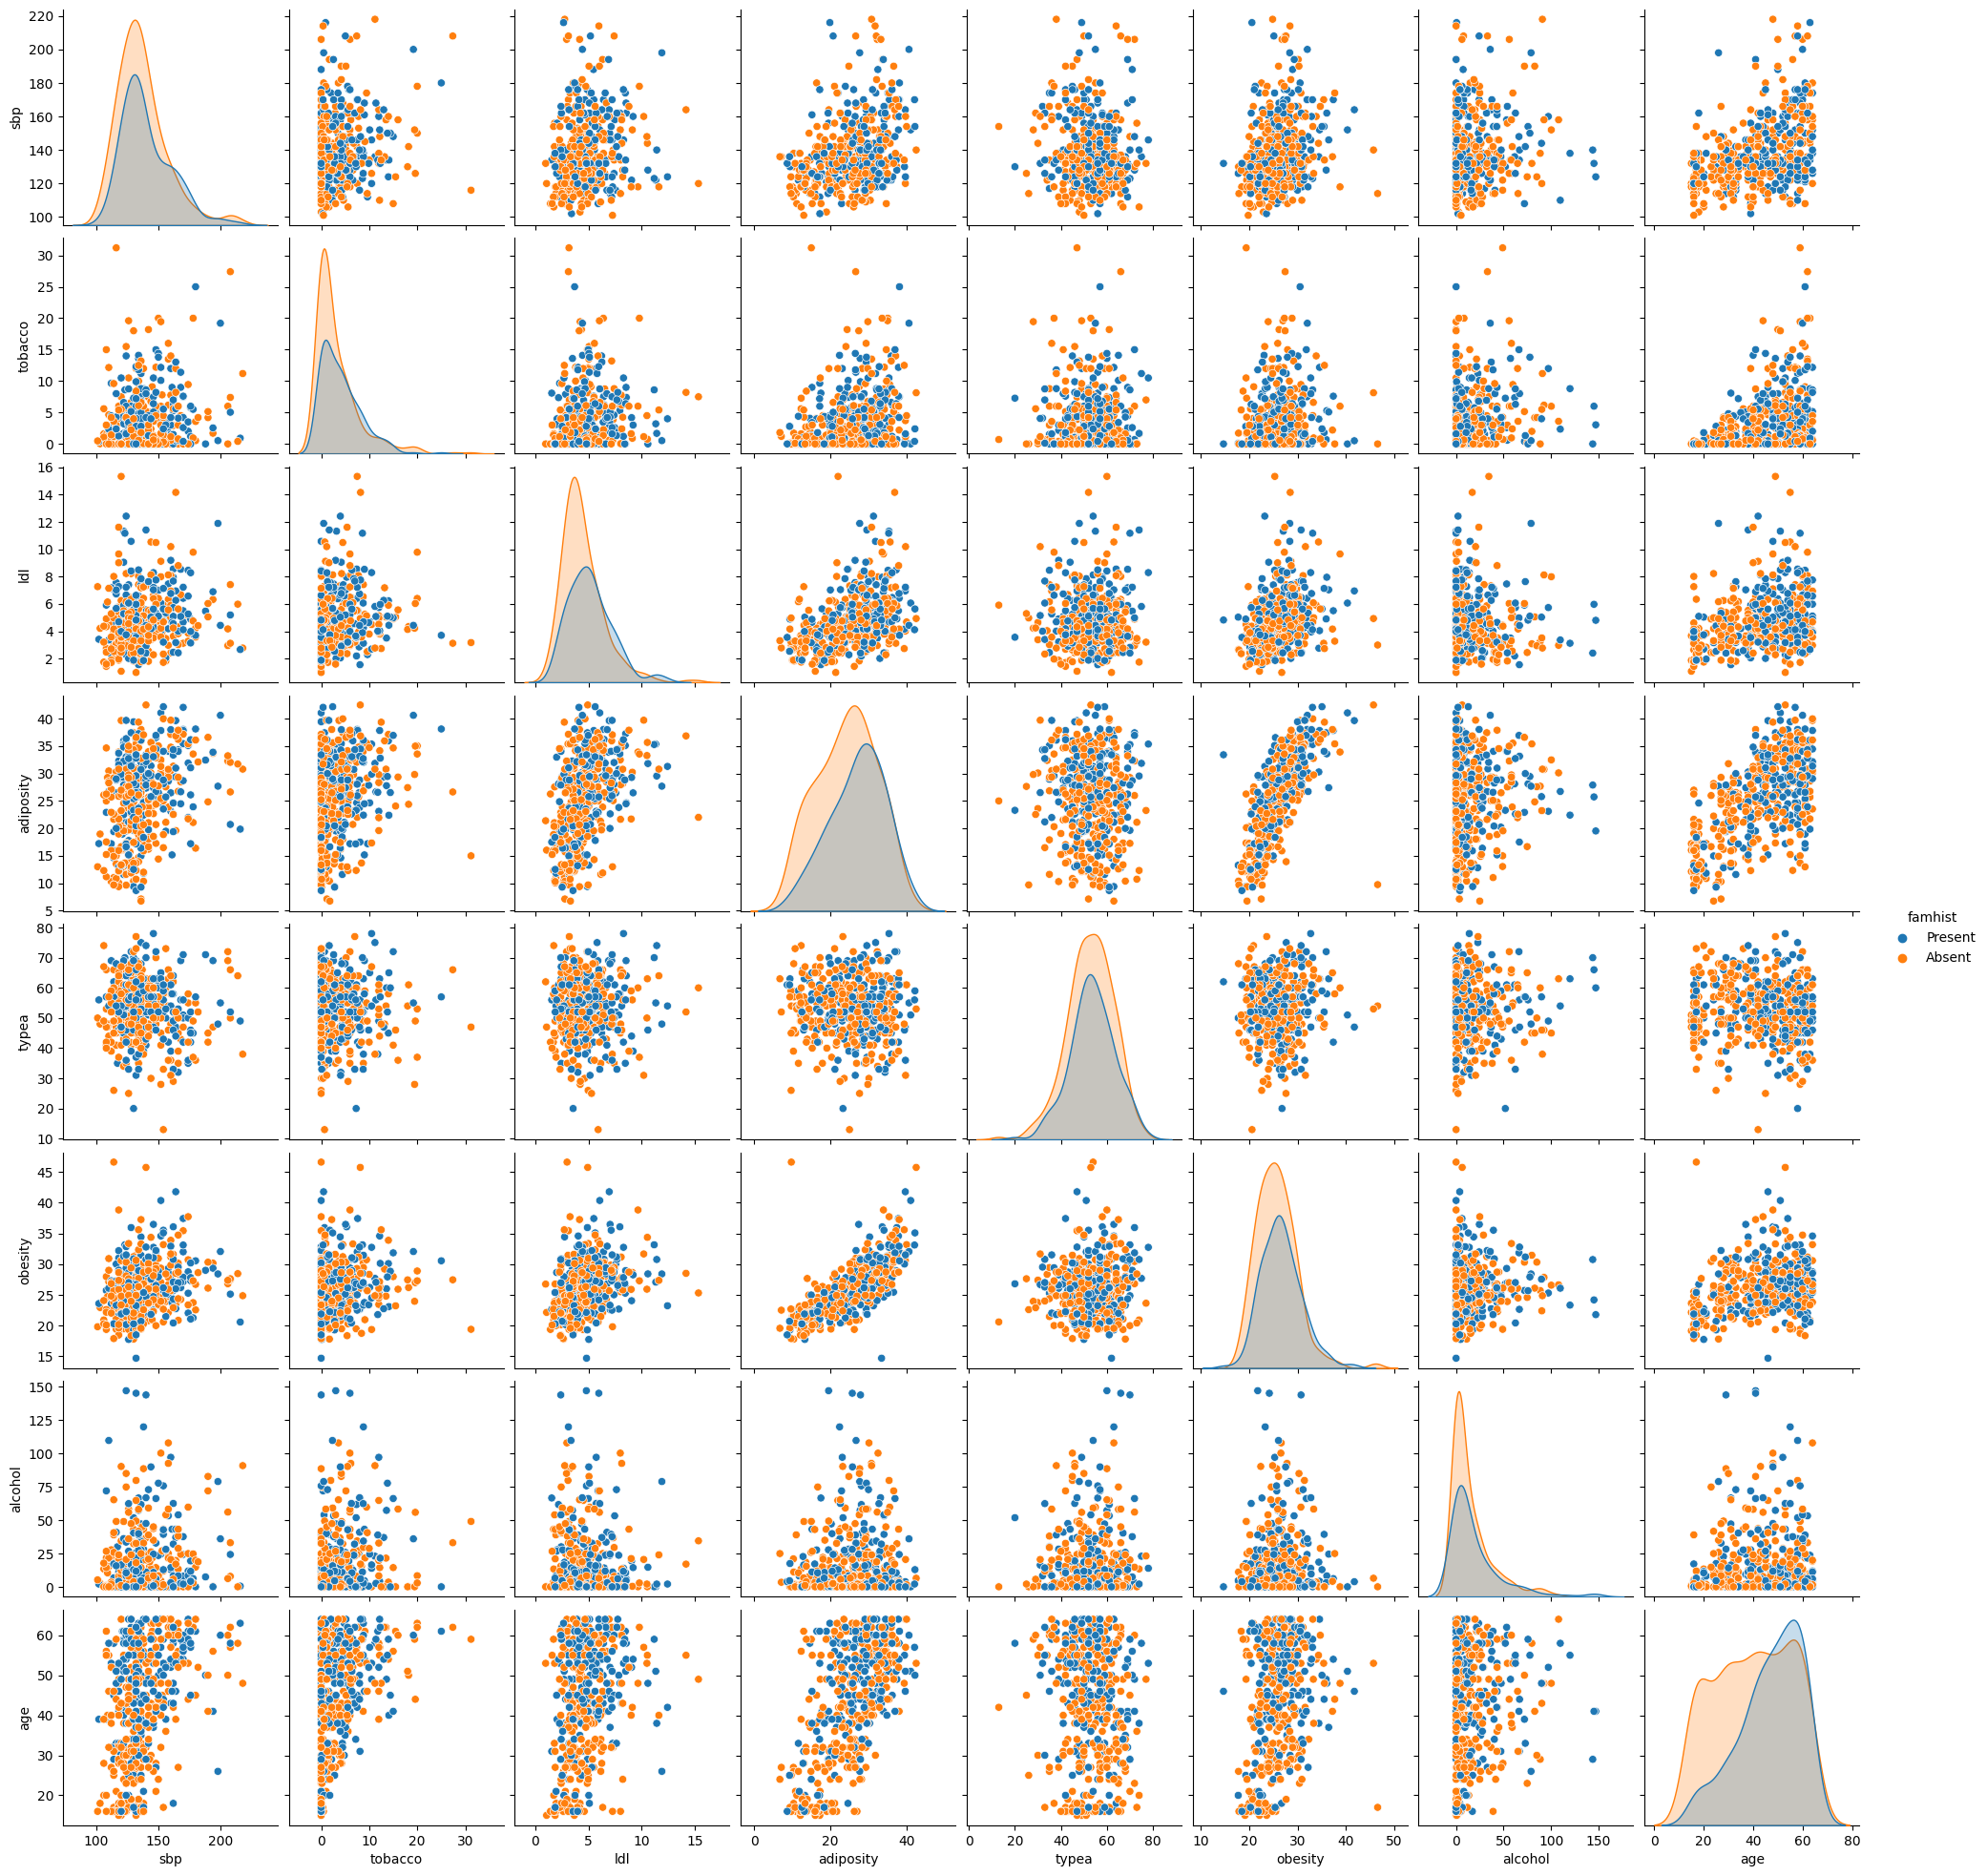

In [ ]:
sns.pairplot(df,hue='famhist')
plt.show()

In [ ]:
df.corr()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
sbp,1.000000,0.212247,0.158296,0.356500,-0.057454,0.238067,0.140096,0.388771
tobacco,0.212247,1.000000,0.158905,0.286640,-0.014608,0.124529,0.200813,0.450330
ldl,0.158296,0.158905,1.000000,0.440432,0.044048,0.330506,-0.033403,0.311799
adiposity,0.356500,0.286640,0.440432,1.000000,-0.043144,0.716556,0.100330,0.625954
typea,-0.057454,-0.014608,0.044048,-0.043144,1.000000,0.074006,0.039498,-0.102606
obesity,0.238067,0.124529,0.330506,0.716556,0.074006,1.000000,0.051620,0.291777
alcohol,0.140096,0.200813,-0.033403,0.100330,0.039498,0.051620,1.000000,0.101125
age,0.388771,0.450330,0.311799,0.625954,-0.102606,0.291777,0.101125,1.000000


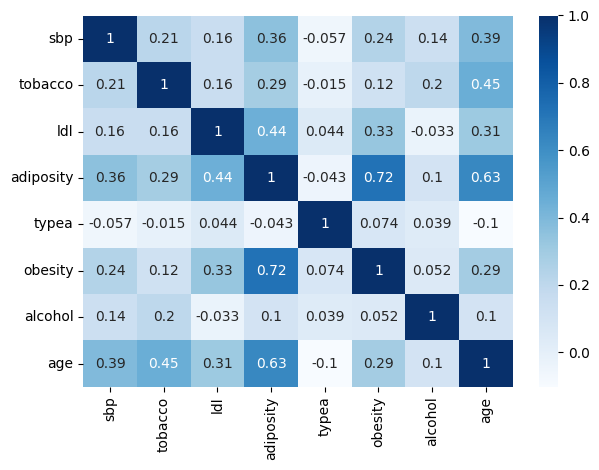

In [ ]:
#class labelencoding 전 feature들간의 상관관계 파악
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.tight_layout()

In [ ]:
#그대로-> 이거 지워도 될 것 같다
df_origin=df
df_origin

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,No
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,Si
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,No
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,No


In [ ]:
#카피
df_origin2=df.copy()
df_origin2

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,No
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,Si
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,No
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,No


# 인코딩
- famhist :  Present = 1, Absent = 0
- chd : Si = 1, No = 0


In [ ]:
#레이블인코더
#famhist :  Present = 1, Absent = 0
#chd : Si = 1, No = 0
df_origin=df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.famhist = le.fit_transform(df.famhist)
df.chd=le.fit_transform(df.chd)
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [ ]:
df.head(2)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1


In [ ]:
df_origin.head(2)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si


In [ ]:
df_origin2.head(2)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si


<Axes: >

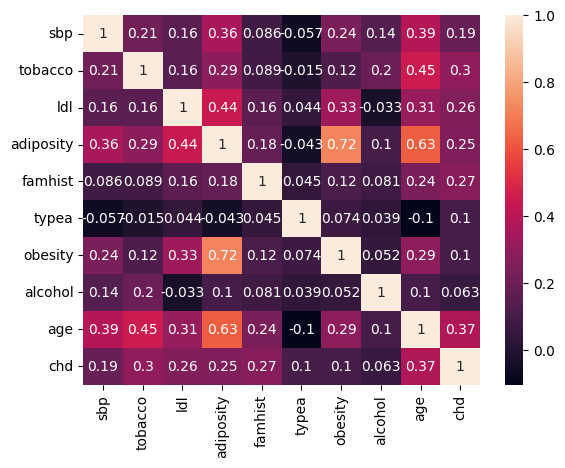

In [ ]:
# Multivariate plot
sns.heatmap(df.corr(), annot=True)

In [ ]:
df[['tobacco','ldl','adiposity','famhist','age']]

,tobacco,ldl,adiposity,famhist,age
0,12.00,5.73,23.11,1,52
1,0.01,4.41,28.61,0,63
2,0.08,3.48,32.28,1,46
3,7.50,6.41,38.03,1,58
4,13.60,3.50,27.78,1,49
...,...,...,...,...,...
457,0.40,5.98,31.72,0,58
458,4.20,4.41,32.10,0,52
459,3.00,1.59,15.23,0,55
460,5.40,11.61,30.79,0,40


In [ ]:
#스케일링 없이 바로 모델링
y=df.chd
x=df[['tobacco','ldl','adiposity','famhist','age']]
#훈련데이터 테스트데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1)

In [ ]:
#루프를 돌려서 한꺼번에 모델을 돌림
# LDA, CART, kNN, SVM, RF. 5개 모델 구축
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(), LinearDiscriminantAnalysis(),KNeighborsClassifier(),SVC()]
scores = []
cvs = []
m=['lr','dt','rf','lda','knn','svm']
for model in models:
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))
    cvs.append(cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy'))
pd.DataFrame(cvs,index=m)


,0,1,2,3,4,5,6,7,8,9
lr,0.8,0.7,0.8,0.666667,0.777778,0.555556,0.666667,0.888889,0.888889,0.666667
dt,0.9,0.6,0.8,0.666667,0.777778,0.444444,0.666667,1.000000,0.777778,0.777778
rf,0.6,0.6,0.7,0.555556,0.777778,0.555556,0.555556,1.000000,0.888889,0.777778
lda,0.8,0.7,0.9,0.555556,0.666667,0.666667,0.666667,0.888889,0.888889,0.666667
knn,0.8,0.6,0.7,0.888889,0.777778,0.555556,0.666667,0.666667,0.666667,0.444444
svm,0.7,0.6,0.7,0.777778,0.777778,0.777778,0.666667,0.666667,0.666667,0.666667


In [ ]:
noscale=pd.DataFrame(cvs,index=m)
noscale['ac']=scores
noscale

#랜덤포레스트가 제일 정확도가 높다.

,0,1,2,3,4,5,6,7,8,9,ac
lr,0.8,0.7,0.8,0.666667,0.777778,0.555556,0.666667,0.888889,0.888889,0.666667,0.763441
dt,0.9,0.6,0.8,0.666667,0.777778,0.444444,0.666667,1.000000,0.777778,0.777778,0.763441
rf,0.6,0.6,0.7,0.555556,0.777778,0.555556,0.555556,1.000000,0.888889,0.777778,0.806452
lda,0.8,0.7,0.9,0.555556,0.666667,0.666667,0.666667,0.888889,0.888889,0.666667,0.763441
knn,0.8,0.6,0.7,0.888889,0.777778,0.555556,0.666667,0.666667,0.666667,0.444444,0.763441
svm,0.7,0.6,0.7,0.777778,0.777778,0.777778,0.666667,0.666667,0.666667,0.666667,0.752688


In [ ]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [ ]:
#민맥스 스케일러
#스케일링 후에 정확도 비교하고 실제로 넣어서 예측

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)



In [ ]:
x.head()

,tobacco,ldl,adiposity,famhist,age
0,12.00,5.73,23.11,1,52
1,0.01,4.41,28.61,0,63
2,0.08,3.48,32.28,1,46
3,7.50,6.41,38.03,1,58
4,13.60,3.50,27.78,1,49


In [ ]:
#스케일 후 비교를 위해 데이터프레임에 넣어주기
x_scaled_d=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled_d.head()

,tobacco,ldl,adiposity,famhist,age
0,0.384615,0.331010,0.457902,1.0,0.755102
1,0.000321,0.239024,0.611748,0.0,0.979592
2,0.002564,0.174216,0.714406,1.0,0.632653
3,0.240385,0.378397,0.875245,1.0,0.877551
4,0.435897,0.175610,0.588531,1.0,0.693878


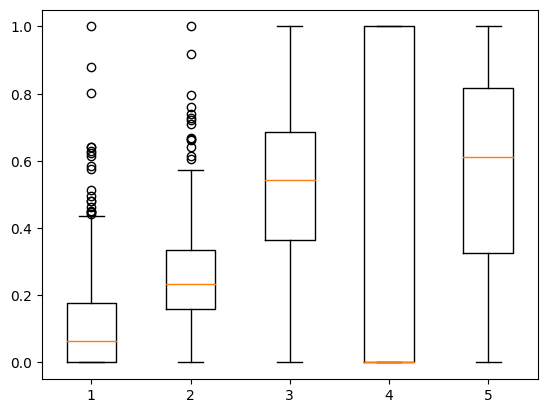

In [ ]:
#스케일링 후 박스플랏
plt.boxplot(scaler.fit_transform(x))
plt.show()

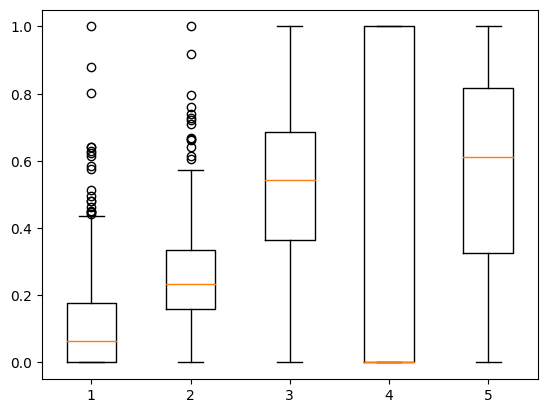

In [ ]:
plt.boxplot(x_scaled_d)
plt.show()

In [ ]:
#트레인 테스트 분리에서 스케일링 한 엑스 와이 다시 넣어주는 과정 빼지 않도록 주의

# y=df.chd
# x=df[['tobacco','ldl','adiposity','famhist','age']]
#훈련데이터 테스트데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=.2, random_state=1)


In [ ]:
df.chd.value_counts()  #둘의 분포도가 차이가 난다.

0    302
1    160
Name: chd, dtype: int64

In [ ]:
#리샘플링-y값질병양성의 양이 너무 작으니 샘플의 양을 늘려준다.
#smote:근처값으로 복제해준다. #랜덤:1값을 랜덤으로 복제해준다.

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27)
x_train, y_train = sm.fit_resample(x_train, y_train)


In [ ]:
#루프를 돌려서 한꺼번에 모델을 돌림->교차검증의 평균 추가
# LDA, CART, kNN, SVM, RF. 5개 모델 구축
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(), LinearDiscriminantAnalysis(),KNeighborsClassifier(),SVC()]
scores2 = []
cvs2 = []
means2 = []
m=['lr','dt','rf','lda','knn','svm']
for model in models:
    model.fit(x_train, y_train)
    scores2.append(model.score(x_test, y_test))
    cvs2.append(cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy'))
    means2.append((cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy')).mean())
pd.DataFrame(cvs2,index=m)


,0,1,2,3,4,5,6,7,8,9
lr,0.7,0.7,0.8,0.555556,0.555556,0.777778,0.666667,0.888889,0.777778,0.777778
dt,0.9,0.7,0.7,0.666667,0.666667,0.444444,0.666667,1.000000,0.888889,0.777778
rf,0.6,0.6,0.7,0.666667,0.777778,0.555556,0.555556,1.000000,0.888889,0.666667
lda,0.8,0.7,0.9,0.555556,0.666667,0.666667,0.666667,0.888889,0.888889,0.666667
knn,0.8,0.5,0.6,0.555556,0.777778,0.666667,0.555556,0.777778,0.666667,0.888889
svm,0.8,0.7,0.8,0.555556,0.555556,0.777778,0.555556,0.888889,0.777778,0.777778


In [ ]:
scalemodel=pd.DataFrame(cvs2,index=m)
scalemodel['means']=scores2
scalemodel['ac']=means2
scalemodel

,0,1,2,3,4,5,6,7,8,9,means,ac
lr,0.7,0.7,0.8,0.555556,0.555556,0.777778,0.666667,0.888889,0.777778,0.777778,0.731183,0.720000
dt,0.9,0.7,0.7,0.666667,0.666667,0.444444,0.666667,1.000000,0.888889,0.777778,0.645161,0.718889
rf,0.6,0.6,0.7,0.666667,0.777778,0.555556,0.555556,1.000000,0.888889,0.666667,0.806452,0.690000
lda,0.8,0.7,0.9,0.555556,0.666667,0.666667,0.666667,0.888889,0.888889,0.666667,0.741935,0.740000
knn,0.8,0.5,0.6,0.555556,0.777778,0.666667,0.555556,0.777778,0.666667,0.888889,0.720430,0.678889
svm,0.8,0.7,0.8,0.555556,0.555556,0.777778,0.555556,0.888889,0.777778,0.777778,0.774194,0.718889


In [ ]:
noscale.head()

,0,1,2,3,4,5,6,7,8,9,ac
lr,0.8,0.7,0.8,0.666667,0.777778,0.555556,0.666667,0.888889,0.888889,0.666667,0.763441
dt,0.9,0.6,0.8,0.666667,0.777778,0.444444,0.666667,1.000000,0.777778,0.777778,0.763441
rf,0.6,0.6,0.7,0.555556,0.777778,0.555556,0.555556,1.000000,0.888889,0.777778,0.806452
lda,0.8,0.7,0.9,0.555556,0.666667,0.666667,0.666667,0.888889,0.888889,0.666667,0.763441
knn,0.8,0.6,0.7,0.888889,0.777778,0.555556,0.666667,0.666667,0.666667,0.444444,0.763441


In [ ]:
df.sample(5)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
74,128,0.40,6.17,26.35,0,64,27.86,11.11,34,0
39,136,11.20,5.81,31.85,1,75,27.68,22.94,58,1
40,118,0.28,5.80,33.70,1,60,30.98,0.00,41,1
130,158,13.50,5.04,30.79,0,54,24.79,21.50,62,0
42,120,0.00,1.07,16.02,0,47,22.15,0.00,15,0


In [ ]:
x_scaled_d.head()

,tobacco,ldl,adiposity,famhist,age
0,0.384615,0.331010,0.457902,1.0,0.755102
1,0.000321,0.239024,0.611748,0.0,0.979592
2,0.002564,0.174216,0.714406,1.0,0.632653
3,0.240385,0.378397,0.875245,1.0,0.877551
4,0.435897,0.175610,0.588531,1.0,0.693878


In [ ]:
#예측
from sklearn.ensemble import RandomForestClassifier
svm = RandomForestClassifier()#random_state=0)
svm.fit(x_train, y_train)#훈련
#평가rf.score(x_test, y_test)
#평가2
from sklearn.metrics import accuracy_score
svm_score = accuracy_score(y_test, svm.predict(x_test)) #0.7402597402597403
#교차검증
from sklearn.model_selection import cross_val_score
svm_cv = cross_val_score(svm, x_test, y_test, scoring='accuracy', cv=10)

print(f'랜덤포레스트 정확도:{svm_score}')
print(f'랜덤포레스트 교차검증: \n {svm_cv}')
svm_cv
#dt_cv.mean(),dt_cv.std()

랜덤포레스트 정확도:0.8064516129032258
랜덤포레스트 교차검증: 
 [0.6        0.6        0.7        0.66666667 0.77777778 0.55555556
 0.55555556 1.         0.88888889 0.55555556]


array([0.6       , 0.6       , 0.7       , 0.66666667, 0.77777778,
       0.55555556, 0.55555556, 1.        , 0.88888889, 0.55555556])

In [ ]:
#실데이터로 예측-titanic5.sample(5)데이터에서 비교하기
#titanic5.iloc[0]
test_data=x_scaled_d.iloc[156,:].values.reshape(1,-1) #함수의 특징.리쉐입해줘야 가능.
svm.predict(test_data)


array([0])

In [ ]:
test_data=x_scaled[156,:].reshape(1,-1)
svm.predict(test_data)

array([0])

In [ ]:
x_scaled_d.to_numpy()[0]

array([0.38461538, 0.33101045, 0.4579021 , 1.        , 0.75510204])

## 혼동행렬

<Axes: >

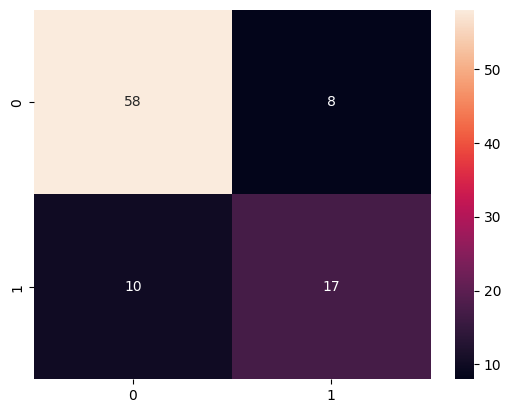

In [ ]:
#from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve #버전때문에 오류남
#혼동행렬
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay
sns.heatmap(confusion_matrix(y_test, svm.predict(x_test)), annot=True)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        66
           1       0.68      0.63      0.65        27

    accuracy                           0.81        93
   macro avg       0.77      0.75      0.76        93
weighted avg       0.80      0.81      0.80        93



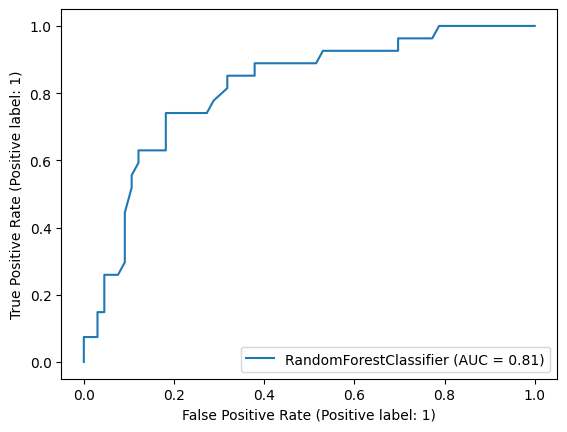

In [ ]:
#분류리포트->양성만보면 돼
print(classification_report(y_test, svm.predict(x_test)))
#roc curve
#plot_roc_curve(svm, x_test, y_test) 버전업 수정

# svc_disp = RocCurveDisplay.from_estimator(svc, x_test, y_test)
# rfc_disp = RocCurveDisplay.from_estimator(rfc, x_test, y_test, ax=svc_disp.ax_)
RocCurveDisplay.from_estimator(svm, x_test, y_test)



In [ ]:
#6교시 변수 뽑는 방법 설명 들
#REF로 뽑아볼게.

In [ ]:
df.head(2)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1


In [ ]:
x.head(2) #스케일링후

,tobacco,ldl,adiposity,famhist,age
0,12.00,5.73,23.11,1,52
1,0.01,4.41,28.61,0,63


In [ ]:
# 복습-여기서부터 다시 해볼게 변수 뽑는거부터
#레이블 인코더 후 엑스와이 나누어서 스케일링
#원본:df_origin3
y=df.chd
x=df.drop('chd',axis=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns) #엑스칼럼될까?
#그냥 스케일링 갚으로 덮어쓸게 어차피 안한거랑 비교 안할거야! 스케일링 한게 더 좋으니까!


Num Features: 4
Selected Features: [False  True  True False False  True False False  True]
Feature Ranking: [3 1 1 5 2 1 4 6 1]


<Axes: xlabel='variable', ylabel='ranking'>

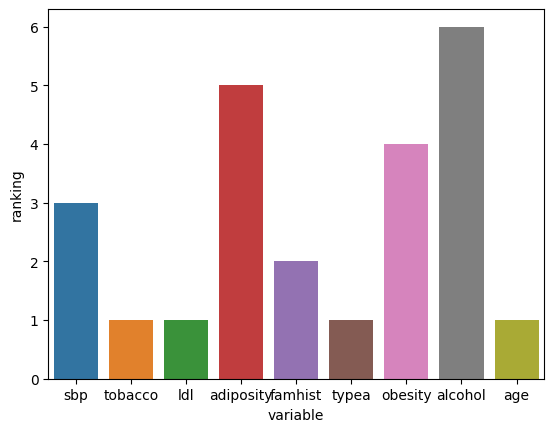

In [ ]:
#정확도를 이용해서 변수를 제거함
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression #다른 알고리즘도 가능
model = LogisticRegression(solver='lbfgs') #솔버 안써도 됨
rfe = RFE(model)#,5) #모델갯수 안써도 됨
fit = rfe.fit(x, y)
print("Num Features: %d" % fit.n_features_) #변수의 갯수
print("Selected Features: %s" % fit.support_) #선택된 변수, 참거짓 값으로 출력
print("Feature Ranking: %s" % fit.ranking_) #변수의 순위

rank = pd.DataFrame({
    'variable': x.columns,
    'ranking': fit.ranking_})
rank.sort_values('ranking')
sns.barplot(x='variable',y='ranking',data=rank)


In [ ]:
x.head(2)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,0.504274,0.384615,0.331010,0.457902,1.0,0.553846,0.332497,0.660371,0.755102
1,0.367521,0.000321,0.239024,0.611748,0.0,0.646154,0.444479,0.013996,0.979592


In [ ]:
#x값 재설정.
x=x[['tobacco','ldl',"famhist",'typea','age']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=.2, random_state=2)

#리샘플링-y값질병양성의 양이 너무 작으니 샘플의 양을 늘려준다.
#smote:근처값으로 복제해준다. #랜덤:1값을 랜덤으로 복제해준다.
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=27)
# x_train, y_train = sm.fit_resample(x_train, y_train)

In [ ]:
#로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
log = LogisticRegression() #변수에 넣어 개체화
log.fit(x_train, y_train)
#평가log_model.score(x_test, y_test)
from sklearn.metrics import accuracy_score
log_score = accuracy_score(y_test, log.predict(x_test))#0.8051948051948052
#교차검증
from sklearn.model_selection import cross_val_score
log_cv = cross_val_score(log, x_test, y_test, cv=10, scoring='accuracy')
print(f'로지스틱회귀분석 정확도:{log_score}')
print(f'로지스틱회귀분석 교차검증: \n {log_cv}')
log_cv
log_cv.mean(),log_cv.std()

로지스틱회귀분석 정확도:0.6989247311827957
로지스틱회귀분석 교차검증: 
 [0.6        0.6        0.9        0.77777778 0.77777778 0.77777778
 0.55555556 0.66666667 0.66666667 0.66666667]


(0.6988888888888889, 0.1011599393699568)

In [ ]:
#중간피드백
#다른 모델도 그냥 해보기-데이터예측은 패스하고
#혼동행렬에 넣고 락커브 보기->끝


In [ ]:
#다른 모델도 그냥 해보기-데이터예측은 패스하고
#혼동행렬에 넣고 락커브 보기->끝

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


#루프를 돌려서 한꺼번에 모델을 돌림
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(), LinearDiscriminantAnalysis(),KNeighborsClassifier(),SVC()]
scores = []
cvs = []
m=['lr','dt','rf','lda','knn','svm']
for model in models:
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))
    cvs.append(cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy'))
pd.DataFrame(cvs,index=m)
####
#추가 데이터프레임(그냥 칼럼옆에 평균표준편차 붙여도 됨.
tab=pd.DataFrame(cvs,index=m)
#모델 비교★-이거쓰기
#선생님필기-고미란 뜯어보기
#테이블
#업그레이드
#model_names = ['Log','DT', 'RF', 'LDA', 'KNN', 'SVM']
#tab = pd.DataFrame([log_cv, dt_cv, rf_cv, lda_cv, knn_cv, svm_cv], index=model_names)
comparison = pd.concat([tab.mean(axis=1), tab.std(axis=1)], axis=1)#sumㄴㄴ
comparison.columns = ['means', 'stds']
comparison['ac']=scores

In [ ]:
comparison

,means,stds,ac
lr,0.698889,0.106632,0.698925
dt,0.580000,0.176134,0.655914
rf,0.688889,0.120698,0.688172
lda,0.717778,0.128642,0.655914
knn,0.717778,0.151915,0.709677
svm,0.676667,0.127275,0.720430


<Axes: >

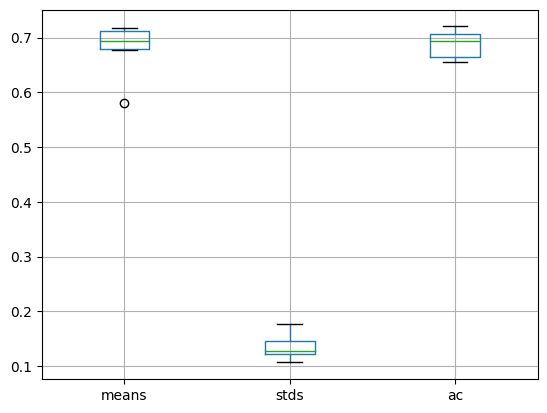

In [ ]:
comparison.boxplot()

<Axes: >

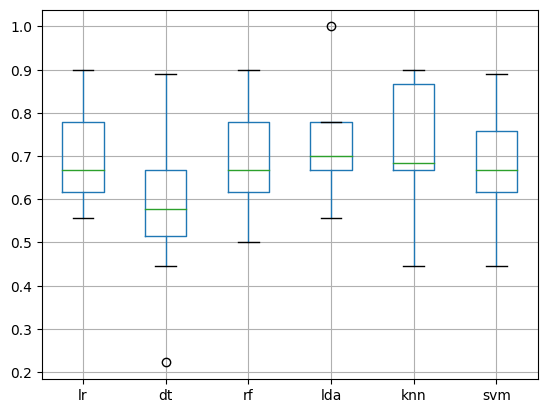

In [ ]:
tab.T.boxplot() #스케일링 맞춰준것 확인?

# .

In [ ]:
#이거 해보고싶은데 에러남 여기까지 할게ㅠㅠ 흑흑 수고했다. 221125집
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve
#혼동행렬
# sns.heatmap(confusion_matrix(y_test, log.predict(x_test)), annot=True)
# #분류리포트
# print(classification_report(y_test, log.predict(x_test)))
# #roc curve
# plot_roc_curve(log, x_test, y_test) #이진분류가 아니어서 에러가 남


ImportError: ignored

In [ ]:
#정확도를 이용해서 변수를 제거함
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #다른 알고리즘도 가능
model = LinearDiscriminantAnalysis()#solver='lbfgs') #솔버 안써도 됨
rfe = RFE(model,5) #모델갯수 안써도 됨
fit = rfe.fit(x, y)
print("Num Features: %d" % fit.n_features_) #변수의 갯수
print("Selected Features: %s" % fit.support_) #선택된 변수, 참거짓 값으로 출력
print("Feature Ranking: %s" % fit.ranking_) #변수의 순위

rank = pd.DataFrame({
    'variable': x.columns,
    'ranking': fit.ranking_})
rank.sort_values('ranking')
sns.barplot(x='variable',y='ranking',data=rank)

#해석주의-막대그래프 낮은애가 선택된 애임 순위1위 오케

In [ ]:
rank

In [ ]:
#로지스틱 회귀분석->진짜로 저 요인들이 정확도가 높은지 확인해보자.
#비교를 위해 x_scaled로 하고싶다
#->x_scaled_d에서 adiposity만 뺸 값으로 해볼게.
#tobacco	ldl	 famhist	age

In [ ]:
df.head()

In [ ]:
x_scaled_d

In [ ]:
y=df.chd #종속
x=x_scaled_d.drop('adiposity',axis=1) #독립

#훈련데이터 테스트데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1)

In [ ]:
#로지스틱 회귀분석->진짜로 저 요인들이 정확도가 높은지 확인해보자.
from sklearn.linear_model import LogisticRegression
log = LogisticRegression() #변수에 넣어 개체화
log.fit(x_train, y_train)
#평가log_model.score(x_test, y_test)
from sklearn.metrics import accuracy_score
log_score = accuracy_score(y_test, log.predict(x_test))#0.8051948051948052
#교차검증
from sklearn.model_selection import cross_val_score
log_cv = cross_val_score(log, x_test, y_test, cv=10, scoring='accuracy')
print(f'로지스틱회귀분석 정확도:{log_score}')
print(f'로지스틱회귀분석 교차검증: \n {log_cv}')
log_cv
log_cv.mean(),log_cv.std()

In [ ]:
#커브랑 혼동행렬까지.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve
#혼동행렬
sns.heatmap(confusion_matrix(y_test, log.predict(x_test)), annot=True)
#분류리포트
print(classification_report(y_test, log.predict(x_test)))
#roc curve
plot_roc_curve(log, x_test, y_test) #이진분류가 아니어서 에러가 남


#딱히..별로인? 헐 근데 커브는 높아.!->커브값이 올라갔음 우와..


## 로지스틱 회귀모델 말고 다른애로 변수 뽑기

In [ ]:
#일단 전체를 스케일링 한 x모델을 따로 만들어서 다시 진행해야 할것같아 지금 헷갈리니까. ㅇㅋㅇㅋ
#그니까 처음부터 스케일링을 다 작업을 하고, 레이블인코더도 다 하고, 난 후의 값을 해야할것 같단 생각이 듬.
#목차 중간중간에 넣어주고.
#지금은 시간이 없으니 스케일링을 생략해서 해볼까?

In [ ]:
#로지스틱 회귀 말고 다른애로 해볼게. -다른 모델들.
#이것도 포문 돌리기 가능 나중에 고미란

#정확도를 이용해서 변수를 제거함
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression #다른 알고리즘도 가능
model = LogisticRegression(solver='lbfgs') #솔버 안써도 됨
rfe = RFE(model) #모델갯수 안써도 됨
fit = rfe.fit(x2, y)
print("Num Features: %d" % fit.n_features_) #변수의 갯수
print("Selected Features: %s" % fit.support_) #선택된 변수, 참거짓 값으로 출력
print("Feature Ranking: %s" % fit.ranking_) #변수의 순위

rank = pd.DataFrame({
    'variable': x2.columns,
    'ranking': fit.ranking_})
rank.sort_values('ranking')
sns.barplot(x='variable',y='ranking',data=rank)

#해석주의-막대그래프 낮은애가 선택된 애임 순위1위 오케

In [ ]:
#일단 모델마다 다른지 확인해볼게
#그리고 돌려볼게 진짜로 씨커브 높은지.비교하고 싶으니까.
#그러면 로지스틱 회귀만 돌려볼까?->일단 이 팩터로만 해볼게.


In [ ]:
df.head()

In [ ]:
#포문 돌리기 변수마다 정확도를 비교하고싶어서
#변수 하나씩 모델을 돌려서 정확도를 확인한 경우
for i in x2.columns:
    model = LogisticRegression()
    c = x2[i]
    model.fit(c.values.reshape(-1,1),y)
    print(i, model.score(c.values.reshape(-1,1),y))


In [ ]:
#로지스틱 회귀분석->진짜로 저 요인들이 정확도가 높은지 확인해보자.
#xy설정부터 다시 해야한다.

In [ ]:
#해보고싶은것
#로지스틱회귀분석으로 진짜 요인들의정확도가 높은지확인해보고싶다
#다른모델들도 요인이 다른지 변수가 다른지 궁금하다